**C1**

**1) Which are the most popular Seattle cycle hiree stations (either for hiring a bike, returning a bike, or both)? Does the popularity of some cycle hire stations vary by month or hour of the day? Aree there some cycle hire stations which have a lot of bikes hired from them but very few dropped off at them (forcing organisers of the scheme to manually transfer bikes between stations)?**

In [79]:
import pandas as pd
df_stations = pd.read_csv('project_data/Seattle_cycles_station.csv')
df_trips = pd.read_csv('project_data/Seattle_cycles_trip.csv', dtype='unicode')
df_weather = pd.read_csv('project_data/Seattle_weather_daily.csv')

In [80]:
df_stations

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN
5,CBD-04,Union St & 4th Ave,47.609221,-122.335596,7/27/2015,18,NaN,18,NaN
6,CBD-05,1st Ave & Marion St,47.604058,-122.335800,10/13/2014,20,NaN,20,NaN
7,CBD-06,2nd Ave & Spring St,47.605950,-122.335768,10/13/2014,20,11/9/2015,18,NaN
8,CBD-07,City Hall / 4th Ave & James St,47.603509,-122.330409,10/13/2014,20,NaN,20,NaN
9,CBD-13,2nd Ave & Pine St,47.610185,-122.339641,10/13/2014,18,NaN,18,NaN


In [81]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [82]:
df_stations.describe()

,lat,long,install_dockcount,current_dockcount
count,58.000000,58.000000,58.000000,58.000000
mean,47.624796,-122.327242,17.586207,16.517241
std,0.019066,0.014957,3.060985,5.117021
min,47.598488,-122.355230,12.000000,0.000000
25%,47.613239,-122.338735,16.000000,16.000000
50%,47.618591,-122.328206,18.000000,18.000000
75%,47.627712,-122.316691,18.000000,18.000000
max,47.666145,-122.284119,30.000000,26.000000


In [83]:
df_trips.info()
df_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   trip_id            286858 non-null  object
 1   starttime          286858 non-null  object
 2   stoptime           286858 non-null  object
 3   bikeid             286858 non-null  object
 4   tripduration       286858 non-null  object
 5   from_station_name  286858 non-null  object
 6   to_station_name    286858 non-null  object
 7   from_station_id    286858 non-null  object
 8   to_station_id      286858 non-null  object
 9   usertype           286858 non-null  object
 10  gender             181558 non-null  object
 11  birthyear          181554 non-null  object
dtypes: object(12)
memory usage: 26.3+ MB


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
count,286858,286858,286858,286858,286858,286858,286858,286858,286858,286858,181558,181554
unique,236065,176216,169285,493,218883,61,61,61,61,3,4,62
top,431,10/13/2014 11:51,10/13/2014 11:51,SEA00281,233.758,Pier 69 / Alaskan Way & Clay St,2nd Ave & Pine St,WF-01,CBD-13,Member,Male,1987
freq,2,18,18,835,7,13054,13784,13054,13784,181557,140564,18128


In [84]:
df_trips.tail(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
286848,255236,8/31/2016 22:13,8/31/2016 22:25,SEA00254,674.993,3rd Ave & Broad St,Occidental Park / Occidental Ave S & S Washing...,BT-01,PS-04,Member,Male,1984
286849,255237,8/31/2016 22:37,8/31/2016 22:39,SEA00330,144.477,Summit Ave & E Denny Way,Summit Ave E & E Republican St,CH-01,CH-03,Member,Male,1990
286850,255238,8/31/2016 22:44,8/31/2016 23:03,SEA00336,1106.063,Pier 69 / Alaskan Way & Clay St,2nd Ave & Blanchard St,WF-01,BT-05,Short-Term Pass Holder,NaN,NaN
286851,255239,8/31/2016 22:44,8/31/2016 23:03,SEA00394,1116.502,Pier 69 / Alaskan Way & Clay St,2nd Ave & Blanchard St,WF-01,BT-05,Short-Term Pass Holder,NaN,NaN
286852,255240,8/31/2016 22:47,8/31/2016 23:03,SEA00370,920.672,Pier 69 / Alaskan Way & Clay St,2nd Ave & Blanchard St,WF-01,BT-05,Short-Term Pass Holder,NaN,NaN
286853,255241,8/31/2016 23:34,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,255242,8/31/2016 23:48,09/01/2016 00:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,255243,8/31/2016 23:47,09/01/2016 00:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,255244,8/31/2016 23:49,09/01/2016 00:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286857,255245,8/31/2016 23:49,09/01/2016 00:20,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [85]:
print(list(df_trips))

['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 'from_station_name', 'to_station_name', 'from_station_id', 'to_station_id', 'usertype', 'gender', 'birthyear']


In [86]:
print(list(df_stations))

['station_id', 'name', 'lat', 'long', 'install_date', 'install_dockcount', 'modification_date', 'current_dockcount', 'decommission_date']


In [87]:
print(list(df_weather))

['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF', 'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In', 'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In', 'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles', 'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH', 'Precipitation_In', 'Events']


In [88]:
df_stations.dtypes

station_id            object
name                  object
lat                  float64
long                 float64
install_date          object
install_dockcount      int64
modification_date     object
current_dockcount      int64
decommission_date     object
dtype: object

In [89]:
df_trips.dtypes

trip_id              object
starttime            object
stoptime             object
bikeid               object
tripduration         object
from_station_name    object
to_station_name      object
from_station_id      object
to_station_id        object
usertype             object
gender               object
birthyear            object
dtype: object

In [90]:
df_weather.dtypes

Date                           object
Max_Temperature_F               int64
Mean_Temperature_F            float64
Min_TemperatureF                int64
Max_Dew_Point_F                 int64
MeanDew_Point_F                 int64
Min_Dewpoint_F                  int64
Max_Humidity                    int64
Mean_Humidity                   int64
Min_Humidity                    int64
Max_Sea_Level_Pressure_In     float64
Mean_Sea_Level_Pressure_In    float64
Min_Sea_Level_Pressure_In     float64
Max_Visibility_Miles            int64
Mean_Visibility_Miles           int64
Min_Visibility_Miles            int64
Max_Wind_Speed_MPH              int64
Mean_Wind_Speed_MPH             int64
Max_Gust_Speed_MPH             object
Precipitation_In              float64
Events                         object
dtype: object

In [91]:
# converted stoptime from object type to datetime 
df_trips['starttime'] = pd.to_datetime(df_trips['starttime'])

In [92]:
df_trips.dtypes

trip_id                      object
starttime            datetime64[ns]
stoptime                     object
bikeid                       object
tripduration                 object
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                    object
dtype: object

In [93]:
# converted stoptime from object type to datetime 
df_trips['stoptime'] = pd.to_datetime(df_trips['stoptime'])

In [94]:
df_trips.dtypes

trip_id                      object
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                 object
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                    object
dtype: object

In [95]:
df_trips['birthyear'] = pd.to_numeric(df_trips['birthyear'], errors='coerce')

In [96]:
df_trips.dtypes

trip_id                      object
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                 object
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [97]:
# added age column (calculated from present year - birthyear)
df_trips['age'] = pd.to_datetime('now', utc='true').year- df_trips['birthyear']

In [98]:
df_trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,age
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,63.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,53.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,35.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,46.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,52.0


In [99]:
trips_statistics = df_trips.describe()

In [100]:
df_trips.describe()

,birthyear,age
count,181553.000000,181553.000000
mean,1979.759062,43.240938
std,10.167119,10.167119
min,1931.000000,24.000000
25%,1974.000000,36.000000
50%,1983.000000,40.000000
75%,1987.000000,49.000000
max,1999.000000,92.000000


In [101]:
trips_missing_value = trips_statistics.isnull().sum()


In [102]:
print(trips_missing_value)

birthyear    0
age          0
dtype: int64


**Temporal Analysis:**

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt 

# converted install and modification dates to datetime objects
df_stations['install_date'] = pd.to_datetime(df_stations['install_date'])
df_stations['modification_date'] = pd.to_datetime(df_stations['modification_date'])
df_stations['decommission_date'] = pd.to_datetime(df_stations['decommission_date'])
df_stations.dtypes

station_id                   object
name                         object
lat                         float64
long                        float64
install_date         datetime64[ns]
install_dockcount             int64
modification_date    datetime64[ns]
current_dockcount             int64
decommission_date    datetime64[ns]
dtype: object

In [104]:
# df_trips['month_year'] = pd.DatetimeIndex(df_trips['starttime']).month
df_trips['month_year'] = df_trips['starttime'].dt.to_period('M')

In [105]:
df_trips['month_year']

0         2014-10
1         2014-10
2         2014-10
3         2014-10
4         2014-10
           ...   
286853    2016-08
286854    2016-08
286855    2016-08
286856    2016-08
286857    2016-08
Name: month_year, Length: 286858, dtype: period[M]

In [108]:
monthly_counts = df_trips['month_year'].value_counts().sort_index()

In [109]:
monthly_counts

2014-10    13170
2014-11    15646
2014-12    11662
2015-01    14736
2015-02    14660
2015-03    19960
2015-04    18774
2015-05    15548
2015-06    15999
2015-07    18808
2015-08    17046
2015-09    13134
2015-10    10605
2015-11     6541
2015-12     5049
2016-01     5162
2016-02     5786
2016-03     6973
2016-04     9029
2016-05    10487
2016-06    11548
2016-07    13342
2016-08    13193
Freq: M, Name: month_year, dtype: int64

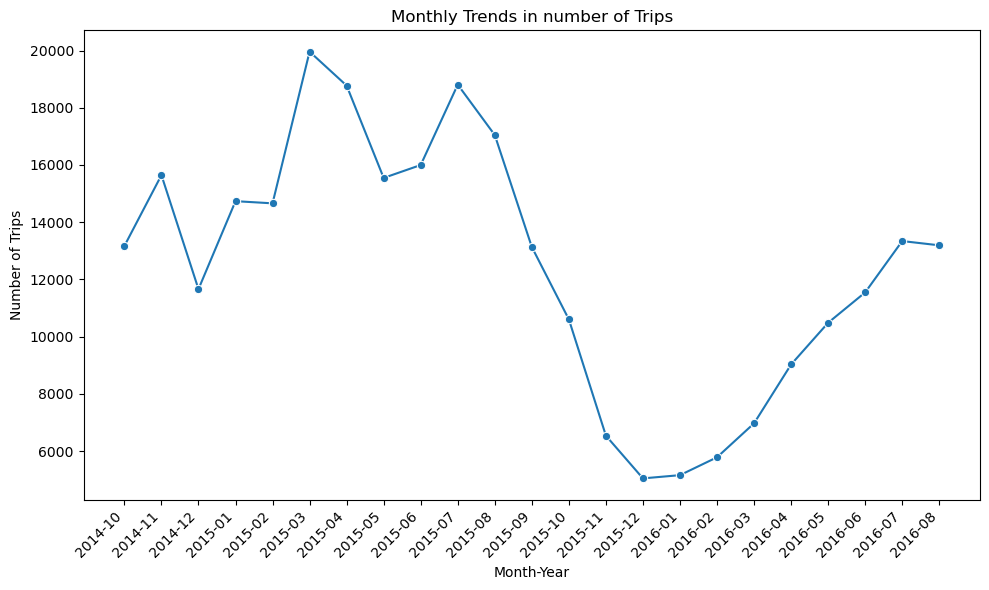

In [117]:
# plotting graph

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o')
plt.title('Monthly Trends in number of Trips')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()